

# Project: Investigating The Movies Data base (TMDb)
Investigating a Dataset that contains information about 10k+ movies collected from TMDb and provided by <a href="https://www.kaggle.com/">kaggle</a></li>, to find trends.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb.org is a crowd-sourced movie information database used by many film-related consoles, sites and apps, such as XBMC, MythTV and Plex.
Kaggle sourced a cleaner version of dataset acquired from TMDb.

I am investigating a Dataset from TMDb that contains information about 10,000 movies released between 1960-2015, collected from The Movie Database (TMDb),including popularty,number of votes given by viewers, ratings,  cast, director, run time budget and revenue.

Basically I want to find trends among movies which are popular and which could not became popular.

Column description were researched from TMDB contribution bible at https://www.themoviedb.org/
A brief description for columns which are not self-explainatory is provided when needed in EDA.


I hope I can answer few question by looking at trends like:

1. Is Popularity of a movie associated with its budget?
2. Do Popular Movies have longer Runtime?
3. Is Ratio of Popular movies to movies released is getting better overtime?
4. Do movies become more popular if they are on certain subjects?
5. Do movies with higher vote_average generate more Revenue as well?
6. Are movie Budgets increasing over the years?
7. Are more movies released around Winter Holidays?
8. Are Vote_average and Popularity same for Top-10 Movies?
9. What are the most common Genres of all time in this dataset?
10. Who directed the most movies?
11. Who are most filmed actors?



In [120]:
# Import statements for all of the packages that I am planning to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [121]:
# Loading the CSV file here.
df = pd.read_csv('tmdb-movies.csv')

In [122]:
# Checking for the first few rows of csv file to have an idea what it looks like:
df.head(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


In [123]:
# Checking the shape of CSV file:
df.shape

(10866, 21)

This CSV file has 10866 Rows and 21 Columns.

In [124]:
# Lets get some more information about csv file.Specially Datatypes and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [125]:
# lets check some summery statistics for this dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Many numeric columns are showing minimum value of zero here.It means that these statistics are not computed in right way. Zeros in budget,adjusted-budget,runtime, revenue and adj-revenue are not possible values for a movie to have.

In [126]:
# Checking for Duplicates
sum(df.duplicated())

1

In [127]:
#Confirming Duplicate because only 1 duplicate is making it suspicious :)

duplicate_rows_df = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows_df)

Duplicate Rows except first occurrence based on all columns are :
         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


Yes, it is only one duplicate row here in this Dataset.

Very few movies have homepage information. Cast is missing in 76 movies. 44 movies do not have Director info.Tagline,keywords,overview and production-comnies have missing values but I am going to drop few coulmns so will check missing values again.



### Data Cleaning

Dataset has one Duplicate row. After confirming that duplicate,I Deduped the dataset.

Second thing I noticed that some columns are not of much use to answer my question.I am deleting those columns.

1. id column is a unique identifier for this dataset. Since each row in this dataframe can be unquily identfied with index. I am deleting it.

2. imdb_id is being deleted for the same reason given above.

3. I am dropping budget and revenue columns because in my opinion budget_adj and revenue_adj are better values to see the trend as they minimize the inflation over time.

4. Columns homepage, tagline and overview cannot help in finding answers to my question. I am deleting these columns.

There are not many missing values but in runtime,adj_budget and adj_revenue many values are Zero. That does not mean they have no runtime, budget or revenue. I am assuming those are missing values and should be replaced with NaN before imputing with means. According to documentation NaN rows are dropped when computing means but zero values will be counted in.

Column realease_date shoudl be in date format.While trying to use to_datetime I encountred the problem that this method is converting years before 1968 to 2068. Fixed it.


In [128]:
#Dropping Duplicate Row and conforming
df = df.drop_duplicates()

df.shape

(10865, 21)

In [129]:
# Dropping all columns that are not required to answer my questions.
col_to_drop = ['id','imdb_id', 'budget','revenue','homepage', 'tagline', 'overview']
df.drop(col_to_drop, axis = 1, inplace = True)

In [130]:
# Replacing zero values of runtime, budget and revenue with Not a Number(NaN)
#becuase otherwise zero budget/Revenues are computed in in mean()
df[['budget_adj','revenue_adj','runtime']] = df[['budget_adj','revenue_adj','runtime']].replace(0,np.NaN)

In [131]:
#Now filling NaN with mean.
df.fillna(df.mean(),inplace=True)

#Checking again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   cast                  10789 non-null  object 
 3   director              10821 non-null  object 
 4   keywords              9372 non-null   object 
 5   runtime               10865 non-null  float64
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


In [132]:
# Droping all rows with Not available values, 
#because string columns still have missing values after imputing means
df = df.dropna(axis=0, how = 'any')

In [133]:
# Checking the basic information one more time to confirm data cleaning process.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8666 non-null   float64
 1   original_title        8666 non-null   object 
 2   cast                  8666 non-null   object 
 3   director              8666 non-null   object 
 4   keywords              8666 non-null   object 
 5   runtime               8666 non-null   float64
 6   genres                8666 non-null   object 
 7   production_companies  8666 non-null   object 
 8   release_date          8666 non-null   object 
 9   vote_count            8666 non-null   int64  
 10  vote_average          8666 non-null   float64
 11  release_year          8666 non-null   int64  
 12  budget_adj            8666 non-null   float64
 13  revenue_adj           8666 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1015.5+ KB


In [134]:
# Date is still object type, Changing release_date to datetime datatype
df['release_date'] = pd.to_datetime(df['release_date'])

# Values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.
# Confirmed it in documentation. Lets fix it.
df.loc[df['release_date'].dt.year >= 2015, 'release_date'] -= pd.DateOffset(years=100)

In [135]:
# saving it for my personal testing now), will delete this cell after done.
#df.to_csv('cleaned.csv', index = False)

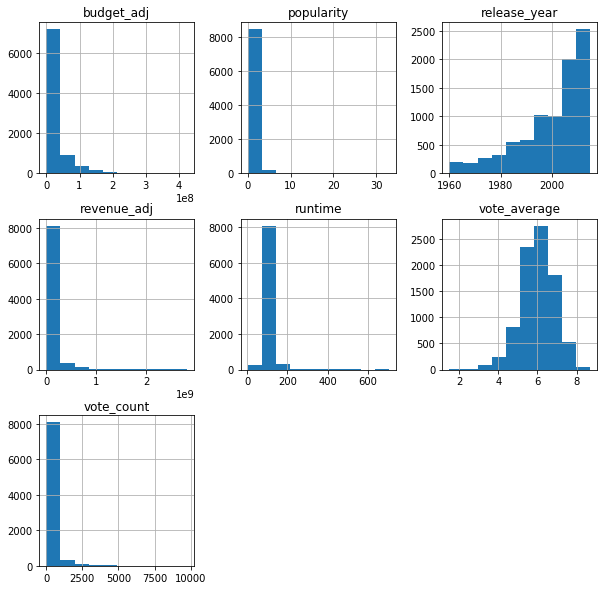

In [136]:
#Lets try to see some trends through histograms.
df.hist(figsize=(10,10));

A very little right skewness in budget.Means that some movies have quite big budgets.

Very few movies reach to the high popularity.Most are siting in the same bin.

From Histograms, It looks like that in our dataset most movies are released after 1990.

Adjusted revenue is right skewed and looks like it has outliers too. Some movies are generating much higher revenue than average.

Not much variation in runtime is visible for majority of movies but outliers can be seen. some movies have runtime more than 600 minutes as average stands around 100 minutes.

Vote average looks like a normal distribution.

Most of the movies are sitting in the same bin, for Vote Count. Few movies are getting much more votes than average.


In [137]:
#Confirming that there are no null values.
print(df.isnull().sum())

popularity              0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1. Is Popularity of a movie associated with its budget?

In [138]:
#Q1.Is popularity associated with budget? I have a feeling that high budgeted movies are more popular.
# Creating two series to grab rows with popularity higer/(lower or equal) than average popularity.

popular = df.popularity > df.popularity.mean()
unpopular = df.popularity <= df.popularity.mean()

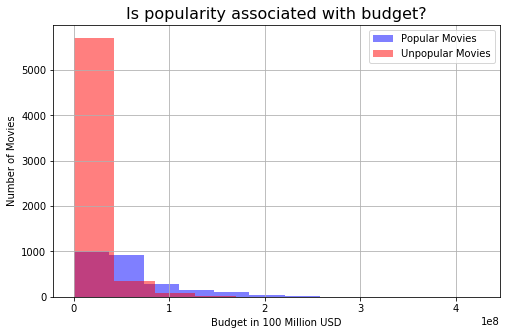

In [139]:
# Ploting histograms for both to see the trend.
df.budget_adj[popular].hist(alpha=0.5, label='Popular Movies',color='blue',figsize=(8,5))
df.budget_adj[unpopular].hist(alpha=0.5, label='Unpopular Movies',color='red',figsize=(8,5))
plt.legend()
plt.title('Is popularity associated with budget?', fontsize=16)
plt.xlabel('Budget in 100 Million USD')
plt.ylabel('Number of Movies');

Yes it looks like high budgeted movies tend to score high popularity but first blue bar indicates that a lot of low budget movies are popular as well.Difference is significant so one can say safely that high budgeted movies have more chance of being popular.

### Question 2.  Do Popular Movies have longer Runtime?

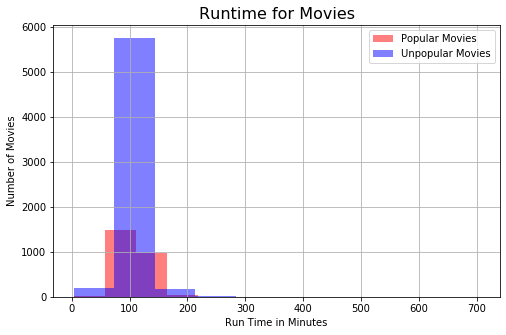

In [140]:
# Question: Popular Movies have high Runtime.
# Ploting histograms for both to see the trend.
df.runtime[popular].hist(alpha=0.5, label='Popular Movies',color='red',figsize=(8,5), bins=10)
df.runtime[unpopular].hist(alpha=0.5, label='Unpopular Movies',color='blue',figsize=(8,5),bins=10)
plt.legend()
plt.title('Runtime for Movies', fontsize=16)
plt.xlabel('Run Time in Minutes')
plt.ylabel('Number of Movies');

### Question 3. Ratio of Popular movies to movies released is getting better overtime?

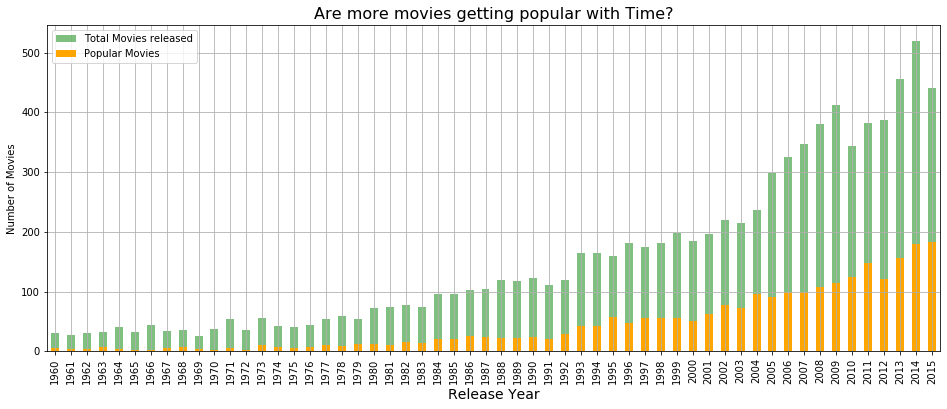

In [141]:
#Grouping by year and then counting number of Popular movies movies.
df.groupby('release_year').popularity.count().plot(kind='bar',figsize= (16,6),alpha=0.5,color='green')
df.groupby('release_year')['popularity'].apply(lambda x: (x >df.popularity.mean()).sum()).plot(kind='bar',figsize= (16,6),color='orange')

#Ploting both subsets.
plt.title('Are more movies getting popular with Time?',fontsize=16)
legend_label =['Total Movies released','Popular Movies']
plt.legend(labels=legend_label)
plt.xlabel('Release Year',fontsize=14)
plt.ylabel('Number of Movies')
plt.grid();

Yes it looks like ratio of popular movies is getting better with years.Specially movies released in last few years of data seem have higher popularity ratio.

### Question 4. Do movies become more popular if they are on certain subjects?

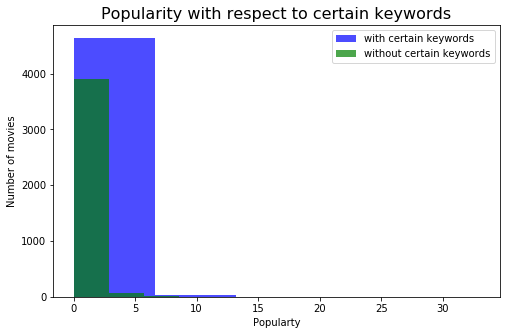

In [142]:
#Q. Movies are more popular if they certain keywords?
#List of Topics
search_keywords = ['woman','novel','sport','murder','sex','biography','nudity','suspense','new york','duringcreditsstinger','musical','female','revenge','dystopia','sequel','high','school','london', 'suicide','police','rape','detective','holiday','friendship','prison','love','world','war','brother','roberry','prostitute','corruption','brother','monster','relationship','teenager','secret']

# Filtering two sets of data with contain keywords and Not contain keywords
df[df.keywords.str.contains('|'.join(search_keywords))].popularity.plot(kind='hist',alpha=0.7, figsize=(8,5),color='blue',bins=5)
df[~df.keywords.str.contains('|'.join(search_keywords))].popularity.plot(kind='hist',alpha=0.7,figsize=(8,5),color='green',bins=5 )
plt.title('Popularity with respect to certain keywords', fontsize=16)
plt.xlabel('Popularty')
plt.ylabel('Number of movies')
leg_lab= ['with certain keywords','without certain keywords']
plt.legend(labels=leg_lab);



Yes it looks like subjects that include certain keywords from my list have high chance of getting popular.

### Question 5. Do movies with higher vote_average generate more Revenue as well?

In [143]:
#Q5.Do movies with higer Voting Average(Rating by Viewers) generate more Revenue.
#Vote_average is another dependendent variable. It is like rating on the scale of 10.
# Creating two series to grab rows with vote_average higer/lower and equal than average rating.

high_rating = df.vote_average > df.vote_average.mean()
low_rating = df.vote_average <= df.vote_average.mean()

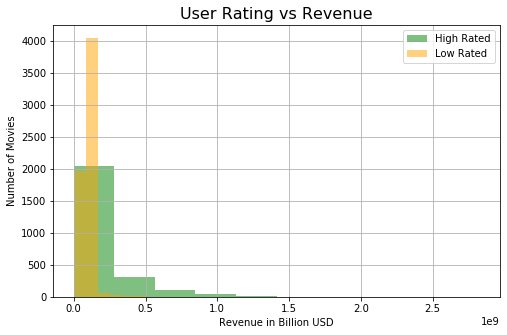

In [144]:
# Ploting histograms for both to see the trend.
df.revenue_adj[popular].hist(alpha=0.5, label='High Rated',color='green',figsize=(8,5))
df.revenue_adj[unpopular].hist(alpha=0.5, label='Low Rated',color='orange',figsize=(8,5))
plt.legend()
plt.title('User Rating vs Revenue', fontsize=16)
plt.xlabel('Revenue in Billion USD')
plt.ylabel('Number of Movies');

Yes, it looks like movies generate more revenue when viewers give them high rating. In my opinion it is a cycle...viewers see rating first and then decide to watch movie and add to revenue.

### Question 6. Are movie Budgets increasing over the years?

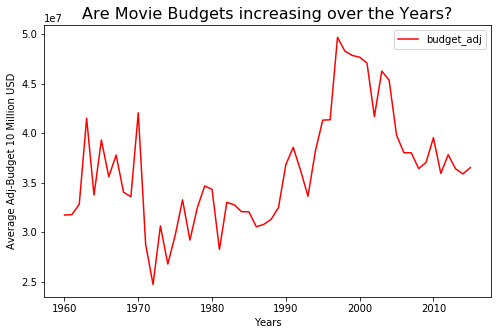

In [145]:
#Question 7. Are movie Budgets increasing over the years?

#Grouping by Year and calculating average inflation-adjusted budget for each year.
dfq7 = df.groupby('release_year')['budget_adj'].mean()

#Ploting Question-1
dfq7.plot(kind='line',x='release_year',y='budget_adj', figsize = (8,5),color='red')
plt.title('Are Movie Budgets increasing over the Years?',fontsize=16)
plt.xlabel('Years')
plt.ylabel('Average Adj-Budget 10 Million USD')
plt.legend();

My visualization tends to infer that above statement is either not true or needs further investigation.There is fluctuation in average budget but not a clear Trend to give a solid statement that Movie Budgets are increasing with years.Just a reminder that I am using inflation adjusted budgets to make it a fair comparison.

### Question 7. Are more movies released around Winter Holidays?

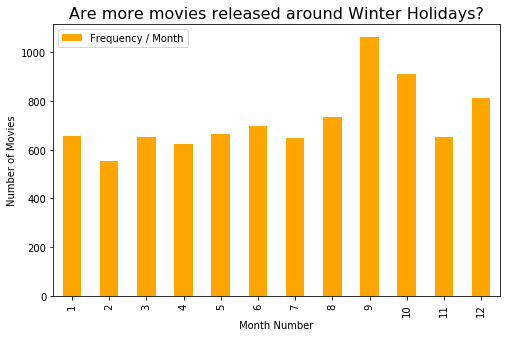

In [146]:
# Filtering the month values from release_date and counting each value.
dfq2_series = df['release_date'].map(lambda d: d.month).value_counts()

#It produced a Series, Converting it to Dataframe..it is easy to work with Dataframe.
dfq2 = dfq2_series.to_frame()

# It is sorted from higest to lowest frequency by default, I need it sorted for month number
dfq2 = dfq2.sort_index()

#Changing name of column only for this question for clarity.
dfq2.rename(columns={"release_date": "Frequency / Month"}, inplace = True)

#Visualization for Question 2.
dfq2.plot(kind='bar', figsize = (8,5), color= 'orange')
plt.title('Are more movies released around Winter Holidays?',fontsize=16)
plt.xlabel('Month Number')
plt.ylabel('Number of Movies');


My visualization shows that most movies are released in the month of September,October and December respectively. Minimum number of movies are released in February.May be it has something to do with new School Year ;)

### Question 8.  Is Rating same as Popularity for Top-10 Movies?

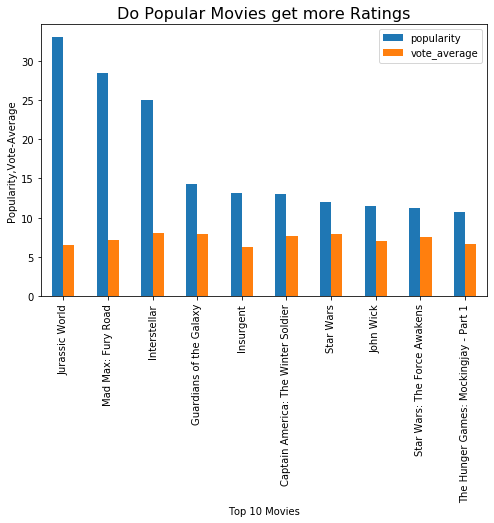

In [147]:
# Filtering 10 largest values in column Popularity 
dfq4 = df.nlargest(10, ['popularity']) 

dfq4.plot(kind ='bar', x= 'original_title',y = ['popularity','vote_average'], figsize = (8,5))
plt.title('Do Popular Movies get more Ratings', fontsize=16)
plt.xlabel('Top 10 Movies')
plt.ylabel('Popularity,Vote-Average');

Popularity is caculated through an algorithm using: 

a. Number of votes for the day

b. Number of views for the day

c. Number of users who marked it as a "favourite" for the day

d. Number of users who added it to their "watchlist" for the day

e. Release date

f. Number of total votes

g. Previous days score



While vote_average is the average of all of the TMDb user ratings.

So a movie can be popular without getting much of votes I inferred.

Runtime does not have significant difference for popular and unpopular movies.

### Question 9.  What are the most common Genres of all time here?

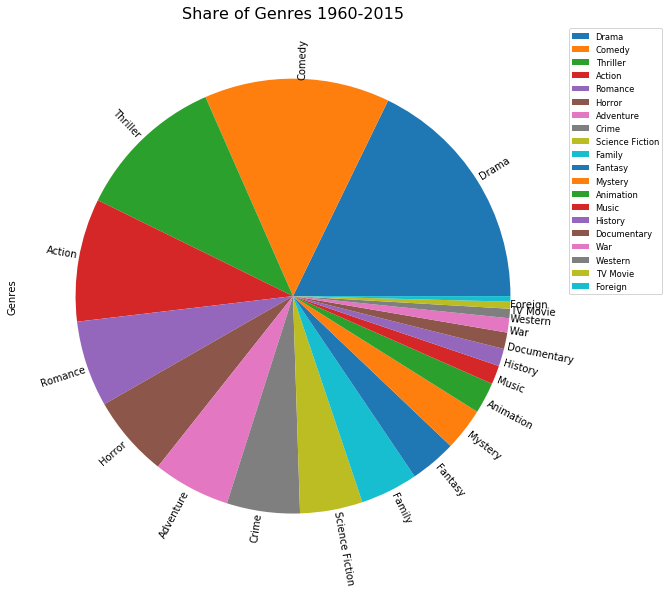

In [148]:
#Function to find count of substrings in a text column

def count_substrings(df,col_name, show_top_num):
    """This function take a DataFrame, specific column-name of the same dataframe 
    with string dataype and an integer to show how many top values are needed.
    it counts all unique substrings in whole column and depending on last integer passed,
    it returns those top counts as series """
    
    # Concatenating all string values of this coulmn into one place
    concat_column = df[col_name].str.cat(sep='|')
    
    # separting each unique substring and storing it in a series
    concat_column = pd.Series(concat_column.split('|'))
    
    #counting occurance of each substring
    count = concat_column.value_counts(ascending = False)
    
    #selecting top n values based on which n is passed by user
    series_created = count.head(show_top_num)
    
    #Converting it into dataframe for ease.
    series_created = series_created.to_frame()
    
    #Changing the name of column to reflect better what it is.
    series_created.rename(columns={0:col_name.capitalize()}, inplace=True)
    
    return(series_created)



#Ploting Pie Chart using above function
count_substrings(df,'genres',20).plot(kind='pie',figsize=(10,10),rotatelabels=True, labeldistance=1.0, subplots = True);
plt.title('Share of Genres 1960-2015', fontsize = 16)
plt.legend(fontsize='small', bbox_to_anchor=(1.0, 1.0));

Total 20 Genres were found in this Data. From Pie Plot it looks like more than half the movies are of Drama,Comedy,Thriller and Action Genres.

### Question 10.  Who directed the most movies?

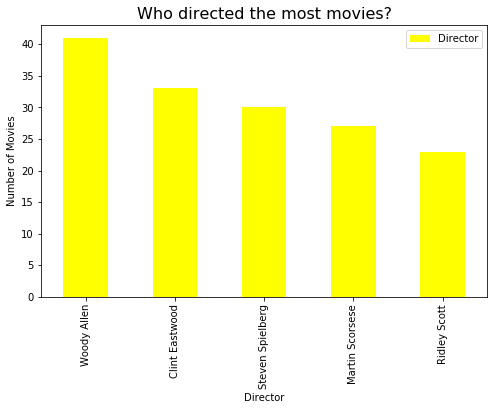

In [149]:
#Ploting using above function

count_substrings(df,'director',5).plot(kind = 'bar', figsize = (8,5), color= 'yellow')
plt.title('Who directed the most movies?',fontsize=16)
plt.xlabel('Director')
plt.ylabel('Number of Movies');

Woody Allen directed most movies in this data set. He directed a little more than 40 movies according to this dataset.

### Questio 11. Who are the most filmed actors?

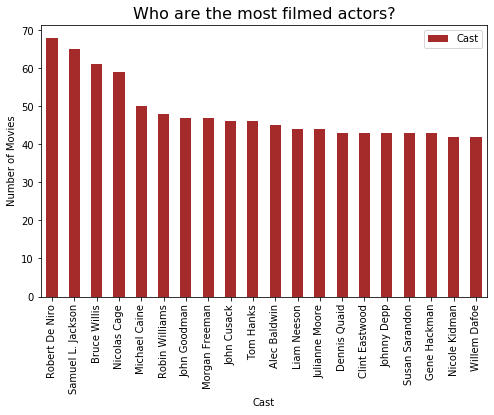

In [150]:
#Ploting top filmed actors from cast column
count_substrings(df,'cast',20).plot(kind = 'bar', figsize = (8,5), color= 'brown')
plt.title('Who are the most filmed actors?',fontsize=16)
plt.xlabel('Cast')
plt.ylabel('Number of Movies');

Robert De Niro is at the top and gets the most filmed actor award according to this dataset.

<a id='conclusions'></a>
## Conclusions

Popularity and vote_count(kind of Rating) are dependent variables in this dataset.

All the rest are independent varaibles at least for my questions.

I noticed that Popularity is associated with movie budget.There is a strong positive correlation between the two.

There seems no clear association between run-time and popularity however popular movies have a smaller range of Runtime than Un-popular movies.

Movies on certain subjects tend to score higher popularity.List of those subjects is provided in Question4.

Movies who get higher rating from viewers(vote_average) tend to generate higher Revenues.

When inflation-adjusted budgets are investigated, it looks like movie budgets are not increasing over time.

Most movies are released in September,October and December. Least movies are released in Febraury.

Vote_average and Popularty are both dependent variables and are two different ways of looking at the Rating of movie. Ten highest popularity movies are not highest voted movies.

Data set has 20 Genres and more than half the movies are of Drama,Comedy,Thriller and Action Genres.

Woody Allen directed most movies in this data set.

Robert De Niro is the mosted casted actor in this dataset. 



###  Limitations

Like every dataset, this one has its own limitations.

Dataset TMDb, has its own unique algorithm of calculating popularity. The whole analysis given here, can change completely, with a minor change in this algorithm. Some of us may not be satisfied with this particular algorithm and hence the trends found here may not satify us all.


TMDb dataset does Not include each and every movie realeased during 1960-2015. Infact it has a very small propotion of movies released in this time frame.

Just to give it a quantitative perspective, I searched and found out that more than 100 movies were released in 1960 but in TMDb data set provided here, I have only 30 movies for 1960.

<a href="https://en.wikipedia.org/wiki/List_of_American_films_of_1960">List of American films of 1960 - Wikipedia</a></li>


So any Trends found here can not be generalized for all the movies. These trends are particular to this dataset only.